# Assignment - 11 Text Mining

## Import Necessary Data

In [1]:
!pip install wordcloud

In [2]:
!pip install textblob

In [3]:
import pandas as pd

from nltk.corpus import stopwords
import nltk

import string

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import wordcloud
from wordcloud import WordCloud

from textblob import TextBlob

import seaborn as sns

import re

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [4]:
text_data = pd.read_csv(r'D:\Downloads\Elon_musk.csv',encoding='latin1')
text_data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
len(text_data)

1999

In [6]:
text_data['Tweets'] = text_data['Text']

In [7]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
text_data['Tweets'] = text_data['Tweets'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [9]:
text_data['Tweets'] = text_data['Tweets'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [10]:
text_data['Tweets'] = text_data['Tweets'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [11]:
text_data['Tweets'] = text_data['Tweets'].str.replace('[0-9]','')

In [12]:
def clean_text(Tweets):
    Tweets = Tweets.lower()
    Tweets = re.sub('\[.*?\]', '', text)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    Tweets = re.sub('\w*\d\w*', '', text)
    Tweets = re.sub("[0-9" "]+"," ",text)
    Tweets = re.sub('[‘’“”…]', '', text)
    
    return Tweets

clean = lambda x: clean_Tweets(x)

In [13]:
text_data

,Unnamed: 0,Text,Tweets
0,1,@kunalb11 Im an alien,kunalb im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...
...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is ufuf


In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
vec = CountVectorizer()
X = vec.fit_transform(text_data["Tweets"])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aber  able  abo  aboard  abort  about  above  absence  absolute  \
0        0     0    0       0      0      0      0        0         0   
1        0     0    0       0      0      0      0        0         0   
2        0     0    0       0      0      0      0        0         0   
3        0     0    0       0      0      0      0        0         0   
4        0     0    0       0      0      0      0        0         0   
...    ...   ...  ...     ...    ...    ...    ...      ...       ...   
1994     0     0    0       0      0      0      0        0         0   
1995     0     0    0       0      0      0      0        0         0   
1996     0     0    0       0      0      0      0        0         0   
1997     0     0    0       0      0      0      0        0         0   
1998     0     0    0       0      0      0      0        0         0   

      absolutely  ...  zikryzamir  zip  zogfotpik  zon  zone  zshauladventure  \
0              0  ...           0    0    

In [16]:
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(text_data["Tweets"])
print(TFIDF)

  (0, 119)	0.6285433221114817
  (0, 159)	0.40744258841301506
  (0, 2825)	0.6625132673210133
  (1, 2694)	0.1604723756939564
  (1, 4843)	0.31540251877820297
  (1, 5273)	0.19332295709705133
  (1, 1753)	0.20428642463027127
  (1, 3330)	0.3555588205218423
  (1, 2686)	0.13380334079919026
  (1, 1760)	0.37477517876954064
  (1, 5212)	0.18572377841406582
  (1, 942)	0.3227082391187474
  (1, 3427)	0.17917636818516897
  (1, 4820)	0.37477517876954064
  (1, 3846)	0.37477517876954064
  (1, 2541)	0.24337285315716084
  (2, 2666)	0.5161856469929814
  (2, 1682)	0.30551902189594055
  (2, 4390)	0.5657784482896928
  (2, 2745)	0.5657784482896928
  (3, 4953)	0.596806822457671
  (3, 1115)	0.4921816913727542
  (3, 1701)	0.596806822457671
  (3, 2686)	0.21307373374822786
  (4, 3230)	0.20590572063438894
  :	:
  (1995, 732)	0.36886193706642917
  (1995, 814)	0.36886193706642917
  (1995, 4631)	0.36886193706642917
  (1995, 393)	0.30419741403217937
  (1995, 3683)	0.17634930483470057
  (1995, 3035)	0.23670501954159281
  (

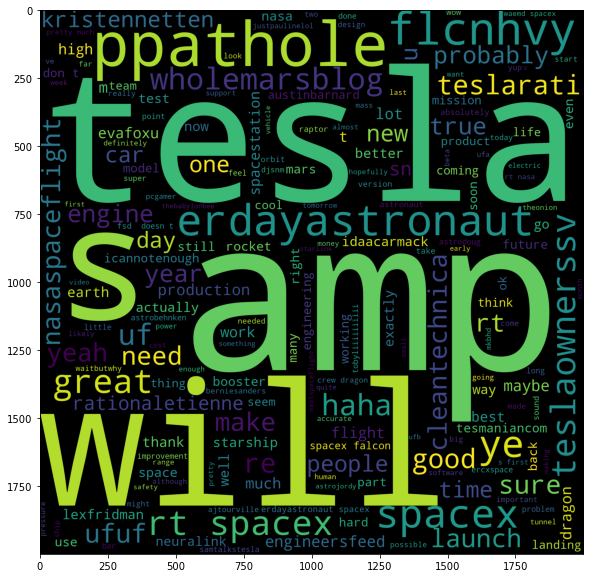

In [17]:
Review_wordcloud = ' '.join(text_data["Tweets"])
wordcloudgraph=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
graph = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(wordcloudgraph)

In [18]:
stopword = pd.Series(' '.join(text_data["Tweets"]).split()).value_counts()[0:20]
stopword

the               486
to                400
a                 358
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
text_data['point'] = text_data["Tweets"].apply(lambda x: TextBlob(x).sentiment[0])
text_data

,Unnamed: 0,Text,Tweets,point
0,1,@kunalb11 Im an alien,kunalb im an alien,-0.250000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.800000
3,4,@gtera27 Doge is underestimated,gtera doge is underestimated,0.000000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...,0.275000
...,...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...,0.111111
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...,0.500000
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,0.000000
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is ufuf,-0.375000


In [21]:
text_data = text_data.drop(['Text'], axis = 1)
text_data

,Unnamed: 0,Tweets,point
0,1,kunalb im an alien,-0.250000
1,2,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000
2,3,joerogan spotify great interview,0.800000
3,4,gtera doge is underestimated,0.000000
4,5,teslacn congratulations tesla china for amazin...,0.275000
...,...,...,...
1994,1995,flcnhvy true it sounds so surreal but the nega...,0.111111
1995,1996,ppathole make sure to read ur terms amp condit...,0.500000
1996,1997,teslagong ppathole samwise gamgee,0.000000
1997,1998,ppathole altho dumb and dumber is ufuf,-0.375000


In [22]:
text_data['sentiment'] = text_data['point'].apply(lambda c: 'Positive' if c >=0.05 else 'Negative')
text_data

,Unnamed: 0,Tweets,point,sentiment
0,1,kunalb im an alien,-0.250000,Negative
1,2,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000,Negative
2,3,joerogan spotify great interview,0.800000,Positive
3,4,gtera doge is underestimated,0.000000,Negative
4,5,teslacn congratulations tesla china for amazin...,0.275000,Positive
...,...,...,...,...
1994,1995,flcnhvy true it sounds so surreal but the nega...,0.111111,Positive
1995,1996,ppathole make sure to read ur terms amp condit...,0.500000,Positive
1996,1997,teslagong ppathole samwise gamgee,0.000000,Negative
1997,1998,ppathole altho dumb and dumber is ufuf,-0.375000,Negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

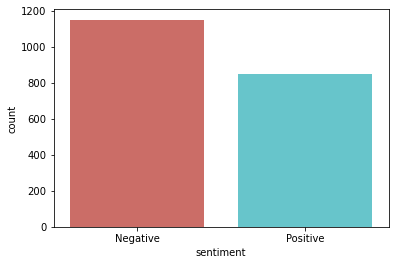

In [23]:
sns.countplot(x='sentiment',data=text_data,palette='hls')

In [24]:
text_data.sentiment.value_counts(normalize=True).mul(100)

Negative    57.478739
Positive    42.521261
Name: sentiment, dtype: float64

<AxesSubplot:xlabel='point', ylabel='Density'>

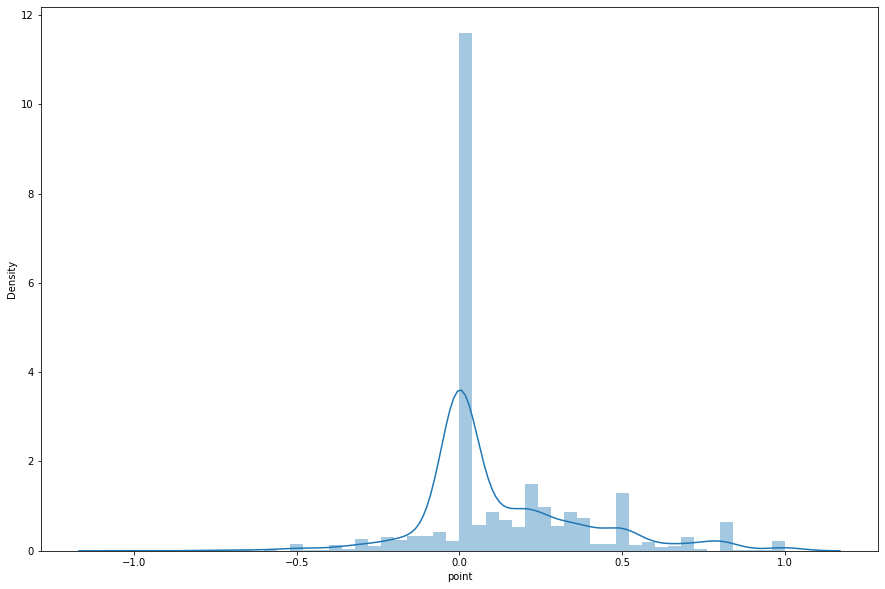

In [26]:
plt.figure(figsize=(15,10))
sns.distplot(text_data['point'])